# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Paul Kenneth H. Remo\
_Student No._: 2020-01185\
_Section_: TX1

### Submission Information

_Date and Time Submitted (most recent upload)_ 03/05/2024 ; 3:05PM:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: PAUL KENNETH H. REMO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [101]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.metrics
import matplotlib.animation as animation
import os
import sys
import sklearn.preprocessing as preprocess
import pandas as pd
par_path = os.path.abspath(os.path.join('..'))
if par_path not in sys.path:
    sys.path.append(par_path)
data_path = os.path.join(par_path, 'data')

In [102]:
data = np.load(os.path.join(data_path, 'spec4000_corrected.npz'))

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [103]:
data.files

['spec_recons', 'wavelength']

In [104]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [105]:
from matplotlib import pyplot as plt
%matplotlib inline

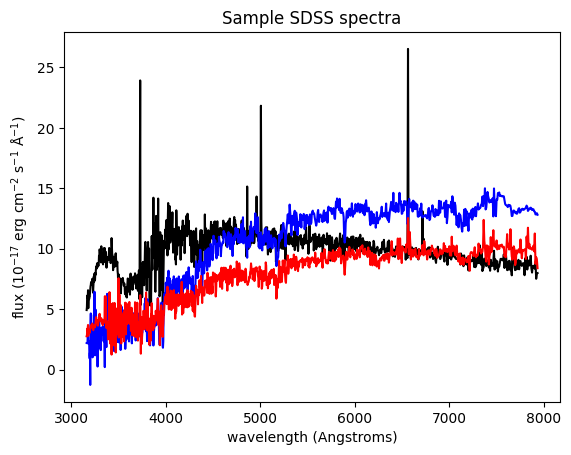

In [106]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")
plt.show()

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


In [107]:
#We normalize the data and store it in flux_norm
flux = data['spec_recons']
flux_norm = preprocess.normalize(flux)
#Take the mean of the norm
mean = flux_norm.mean(0)

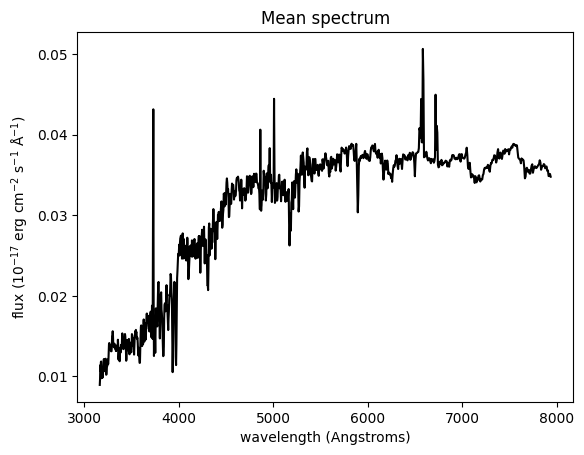

The peaks of the mean spectrum are [3729.07 5007.26 6564.48 6588.7  6717.38 6729.77]


In [108]:
#Plotting the mean
sort = np.sort(mean)
max = sort[-7:-1]
peak = np.zeros_like(max)
for i in range (len(max)):
    for j in range(len(mean)):
        if max[i] == mean[j]:
            peak[i] = round(data['wavelength'][j], 2)
plt.plot(wavelength, mean, label = 'flux mean', color ='0')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Mean spectrum")
plt.show()
print('The peaks of the mean spectrum are' ,np.sort(peak))

**From [1], the peaks of the mean spectrum are as follows**\
*The peak at 3729.07* shows an emission line that implies the presence of hydrogen\
*The peak at 5007.26* shows an emission line that implies the presence of oxygen\
*The peaks at 6564.48 and 6588.7* also shows an emission line that implies the presence of hydrogen, but is of a different type, namely hydrogen-alpha\
*The last peaks, at 6717.38 6729.77* shows an emission line that implies the presence of sulfur

In [109]:
#We now use PCA to change the dimensionality of our spectra, lowering it from 1000 components to just 4
pca = decomposition.PCA(n_components=4)
flux_norm_proj = pca.fit_transform(flux_norm)  

2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

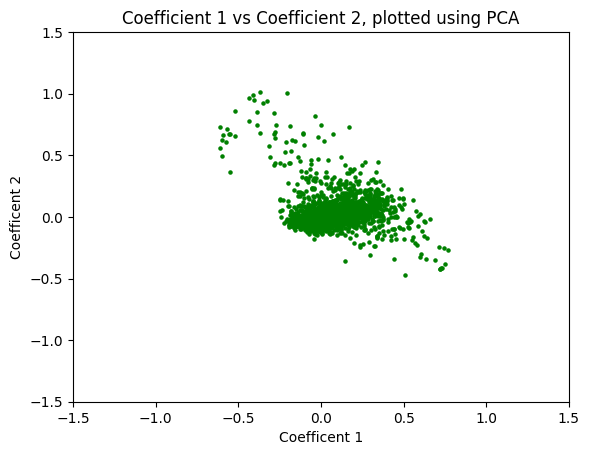

In [110]:
#Plotting the first 2 eigenfunctions against each other
plt.scatter(flux_norm_proj[:,0], flux_norm_proj[:,1], s = 5, color = 'green')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('Coefficent 1')
plt.ylabel('Coefficent 2')
plt.title('Coefficient 1 vs Coefficient 2, plotted using PCA')
plt.show()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

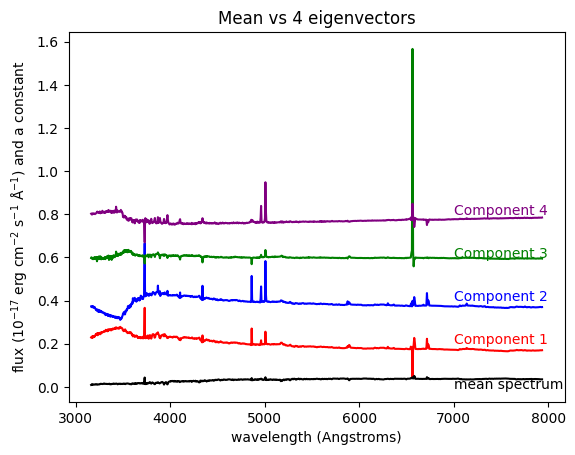

In [181]:
#Now we start plotting the 4 components and checking if they correspond to the mean
plt.plot(wavelength, pca.components_[0] +0.2, color = 'red')
plt.plot(wavelength, pca.components_[1] +0.4, color = 'blue')
plt.plot(wavelength, pca.components_[2] +0.6, color = 'green')
plt.plot(wavelength, pca.components_[3] +0.8, color = 'purple')
plt.plot(wavelength, mean, color = '0')
plt.text(7000, 0.2, "Component 1", color = 'red')
plt.text(7000, 0.4, "Component 2", color = 'blue')
plt.text(7000, 0.6, "Component 3", color = 'green')
plt.text(7000, 0.8, "Component 4", color = 'purple')
plt.text(7000, -0.01, "mean spectrum", color = '0')
plt.xlabel("wavelength (Angstroms)")
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and a constant")
plt.title('Mean vs 4 eigenvectors')
plt.show()

**From this, we see that we have succesfully reduced the dimensions of the sample set from 1000 different components down to just 4, since we are able to approximate the mean spectrum using just the 4 principal values**\
We are also able to mimic the peaks at the wavelengths corresponding to their corresponding elements

*References*\
[1] 'Reading Galaxy Spectra', http://astronomy.nmsu.edu/geas/lectures/lecture27/slide02.html\
[2] 'Dimensionality Reduction' https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html?fbclid=IwAR2umyEa-3mx9BiJCnGsUhr7iIoB_dEU2KZQ2C3yxE19BnxBIBf9J3zrmu8